In [33]:
from experiments.evaluation_flow.shared import MODELS
from experiments.plots.util import *

In [34]:
all_files_parsed = parse_all_log_files('/Users/nils/Downloads/log-dir')
baseline_only = filter_parsed_files(all_files_parsed, ('approach', 'baseline'))
baseline_versions = filter_parsed_files(baseline_only, ('snapshot_type', 'fine-tuned'))
baseline_version_food = filter_parsed_files(baseline_versions, ('snapshot_dist', 'food'))

baseline_version_food_server = filter_parsed_files(baseline_version_food, ('location', 'server'))
baseline_version_food_server_0 = filter_parsed_files(baseline_version_food_server, ('run', '1'))

baseline_version_food_node = filter_parsed_files(baseline_version_food, ('location', 'node'))
baseline_version_food_node_0 = filter_parsed_files(baseline_version_food_node, ('run', '1'))

save_times = {}

for file in baseline_version_food_server_0:
    meta, events = file
    times = {}
    for e in events:
        if e.use_case == U_1:
            times[U_1] = e.duration_s
        elif e.use_case == U_2:
            times[U_2] = e.duration_s
    save_times[meta[MODEL]] = times

for file in baseline_version_food_node_0:
    meta, events = file
    times = {}
    u31_counter = 1
    u32_counter = 1
    for e in events:
        if e.use_case and e.use_case.startswith(U_3_1):
            key = "{}_{}".format(e.use_case, u31_counter)
            times[key] = e.duration_s
            u31_counter += 1
        elif e.use_case and e.use_case.startswith(U_3_2):
            key = "{}_{}".format(e.use_case, u32_counter)
            times[key] = e.duration_s
            u32_counter += 1
    save_times[meta[MODEL]].update(times)

file is broken: /Users/nils/Downloads/log-dir/server--model:googlenet--approach:param_update_improved--snapshot_type:version--snapshot_dist:food--run:0.txt


In [35]:
print(save_times)

{'googlenet': {'U_1': 11.880682552000001, 'U_2': 1.8830384820000001, 'U_3_1_1_1': 1.8271134370000002, 'U_3_1_2_2': 1.811026092, 'U_3_1_3_3': 1.8670316470000001, 'U_3_1_4_4': 1.8646027850000002, 'U_3_2_1_1': 1.91464333, 'U_3_2_2_2': 1.890809221, 'U_3_2_3_3': 1.9369131970000002, 'U_3_2_4_4': 1.928661568}, 'resnet18': {'U_1': 11.917529002, 'U_2': 1.922617905, 'U_3_1_1_1': 1.882286318, 'U_3_1_2_2': 1.933498855, 'U_3_1_3_3': 1.9423652160000002, 'U_3_1_4_4': 1.935279677, 'U_3_2_1_1': 2.018406864, 'U_3_2_2_2': 2.0210485250000003, 'U_3_2_3_3': 2.064824043, 'U_3_2_4_4': 2.101403286}, 'mobilenet': {'U_1': 11.777751464000001, 'U_2': 1.71836794, 'U_3_1_1_1': 1.6849537700000001, 'U_3_1_2_2': 1.702496518, 'U_3_1_3_3': 1.719161919, 'U_3_1_4_4': 1.735316172, 'U_3_2_1_1': 1.7521111, 'U_3_2_2_2': 1.739205109, 'U_3_2_3_3': 1.7493808590000002, 'U_3_2_4_4': 1.7608791190000002}, 'resnet152': {'U_1': 12.963334486, 'U_2': 2.9445510660000003, 'U_3_1_1_1': 2.874209569, 'U_3_1_2_2': 2.9854655450000003, 'U_3_1_3_

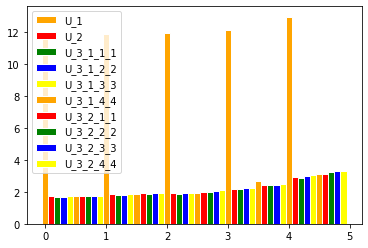

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bars
barWidth = 0.1

bars = {}
for m in MODELS:
    times = save_times[m]
    for use_case, time in times.items():
        if use_case in bars:
            bars[use_case].append(time)
        else:
            bars[use_case] = [time]

# Set position of bar on X axis
# l = len(bars[U_1])
# print(l)
# positions = [np.arange(l)]
# for i in range(1, len(bars)):
#     prev_positions = positions[-1]
#     positions.append(prev_positions)

r1 = np.arange(5)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]
positions = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10]

colors = ['orange', 'red', 'green', 'blue', 'yellow', 'orange', 'red', 'green', 'blue', 'yellow']

for position, bar, color, label in zip(positions, list(bars.values())[:], colors, list(bars.keys())[:]):
    plt.bar(position, bar, color=color, width=barWidth, edgecolor='white', label=label)

# # Add xticks on the middle of the group bars
# plt.xlabel('group', fontweight='bold')
# plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])

# Create legend & Show graphic
plt.legend()
plt.show()

In [37]:
meta, events = baseline_version_food_server_0[0]
e_u1 = events[0]
e_u2 = events[5]
print(e_u1)
print(e_u2)



U_1: 11.8806825520s 
_save_full_model -- all: 10.2024775140s 
	_save_full_model -- pickle_weights: 0.0525675160s 
	_save_full_model -- _get_weights_hash_info: 0.0392311020s 
	_save_full_model -- persist_model_info: 10.1092519620s 
		persist -- schema_obj(model_info): 10.1090806650s 
			persist -- schema_obj(recover_info): 10.0997528910s 
				mmlib_file_pers -- save_file: 0.0216881000s 
				mmlib_file_pers -- save_file: 0.0564565860s 
				persist -- schema_obj(environment): 10.0191595150s 
					mmlib_dict_pers -- save_dict -- collection(environment): 10.0189477380s 
				mmlib_dict_pers -- save_dict -- collection(recover_info): 0.0021978190s 
			mmlib_dict_pers -- save_dict -- collection(model_info): 0.0077264880s 

U_2: 1.8830384820s 
_save_full_model -- all: 0.1936756490s 
	_save_full_model -- pickle_weights: 0.0626255630s 
	_save_full_model -- _get_weights_hash_info: 0.0393848110s 
	_save_full_model -- persist_model_info: 0.0908654000s 
		persist -- schema_obj(model_info): 0.090724303